In [ ]:
# Rosa Lee
# INF2178: Assignment 3

# Impport the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Loading the dataset from Google Drive
from google.colab import drive
drive.mount("/drive", force_remount=True)
data = pd.read_csv("/drive/MyDrive/INF2178_A3_data.csv")

# Printing the first five rows of the data
print(data.head())

Mounted at /drive
   fallreadingscore  fallmathscore  fallgeneralknowledgescore  \
0             36.58          39.54                     33.822   
1             50.82          44.44                     38.147   
2             40.68          28.57                     28.108   
3             32.57          23.57                     15.404   
4             31.98          19.65                     18.727   

   springreadingscore  springmathscore  springgeneralknowledgescore  \
0               49.37            50.10                       40.533   
1               83.50            58.93                       37.409   
2               40.41            32.81                       29.312   
3               34.14            35.25                       27.382   
4               32.84            23.60                       26.977   

   totalhouseholdincome  incomeinthousands  incomegroup  
0              140000.0              140.0            3  
1              120000.0              120.0      

In [ ]:
# Exploratory Data Analysis (EDA)
print(data.head())
print(data.describe())

# Check for missing values
print(data.isnull().sum())

   fallreadingscore  fallmathscore  fallgeneralknowledgescore  \
0             36.58          39.54                     33.822   
1             50.82          44.44                     38.147   
2             40.68          28.57                     28.108   
3             32.57          23.57                     15.404   
4             31.98          19.65                     18.727   

   springreadingscore  springmathscore  springgeneralknowledgescore  \
0               49.37            50.10                       40.533   
1               83.50            58.93                       37.409   
2               40.41            32.81                       29.312   
3               34.14            35.25                       27.382   
4               32.84            23.60                       26.977   

   totalhouseholdincome  incomeinthousands  incomegroup  
0              140000.0              140.0            3  
1              120000.0              120.0            3  
2       

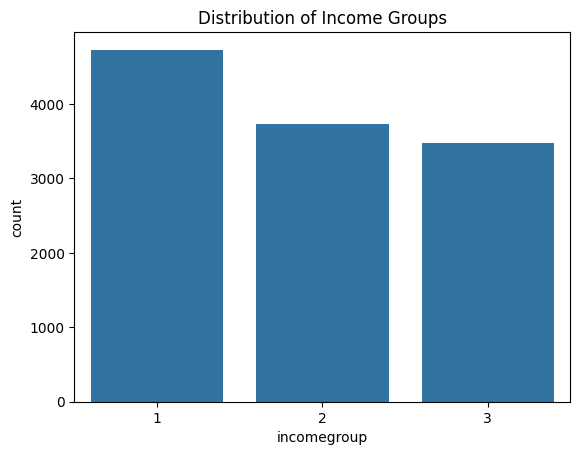

In [ ]:
# Checking distribution of income groups
sns.countplot(x='incomegroup', data=data)
plt.title('Distribution of Income Groups')
plt.show()

In [ ]:
# ANCOVA Analysis
# Model 1: Spring Reading Score ~ Fall Reading Score + Income
model1 = ols('springreadingscore ~ fallreadingscore + incomegroup', data=data).fit()
print(model1.summary())

# Model 2: Spring Math Score ~ Fall Math Score + Income
model2 = ols('springmathscore ~ fallmathscore + incomegroup', data=data).fit()
print(model2.summary())


                            OLS Regression Results                            
Dep. Variable:     springreadingscore   R-squared:                       0.692
Model:                            OLS   Adj. R-squared:                  0.692
Method:                 Least Squares   F-statistic:                 1.339e+04
Date:                Thu, 21 Mar 2024   Prob (F-statistic):               0.00
Time:                        17:43:14   Log-Likelihood:                -41675.
No. Observations:               11933   AIC:                         8.336e+04
Df Residuals:                   11930   BIC:                         8.338e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            6.3272      0.280  

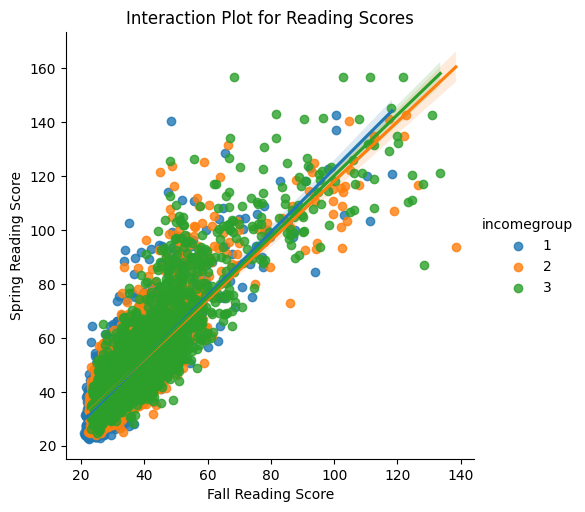

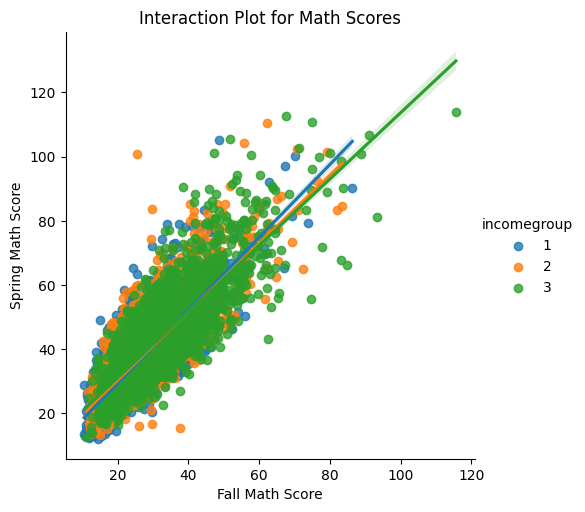

In [ ]:
# Interaction Plot for Fall Reading Score and Math Score
sns.lmplot(x='fallreadingscore', y='springreadingscore', hue='incomegroup', data=data)
plt.title('Interaction Plot for Reading Scores')
plt.xlabel('Fall Reading Score')
plt.ylabel('Spring Reading Score')
plt.show()

sns.lmplot(x='fallmathscore', y='springmathscore', hue='incomegroup', data=data)
plt.title('Interaction Plot for Math Scores')
plt.xlabel('Fall Math Score')
plt.ylabel('Spring Math Score')
plt.show()

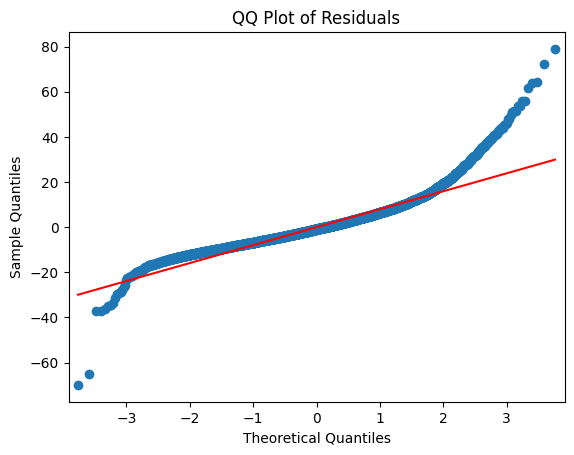

In [ ]:
# Assumptions Testing
# Checking for homogeneity of regression slopes
sm.stats.anova_lm(model1, typ=3)

# Checking for normality of residuals
residuals = model1.resid
fig, ax = plt.subplots()
sm.qqplot(residuals, line='s', ax=ax)
plt.title('QQ Plot of Residuals')
plt.show()